In [1]:
# !pip install keras
# !pip install tensorflow
!pip install joblib

In [2]:
# # IMPORTING LIBRARIES
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.metrics import mean_squared_error,r2_score
# import seaborn as sns
# import scipy as sp
# import sklearn as sk

# ## for Deep-learing:
# import keras
# from keras.layers import Dense
# from keras.models import Sequential
# from keras.utils import to_categorical
# from keras.optimizers import SGD 
# from keras.callbacks import EarlyStopping
# from keras.utils import np_utils
# import itertools
# from keras.layers import LSTM
# from keras.layers.convolutional import Conv1D
# from keras.layers.convolutional import MaxPooling1D
# from keras.layers import Dropout

# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

from joblib import dump

In [3]:
df = pd.read_excel("gold_data.xlsx")
col = df.columns
df = df.iloc[:,1:]
print(df.describe())

scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns = col[1:])
# print(df.head)

       USD Index Starting    Oil open  USD To Euro  USD To INR  USD To CNY  \
count          566.000000  566.000000   566.000000  566.000000  566.000000   
mean            94.443145   58.329841     0.864571   74.230788    6.639708   
std              3.061222   20.892915     0.031876    1.303868    0.268591   
min             89.320000   12.960000     0.810520   70.718903    6.308400   
25%             92.184999   41.077501     0.841522   73.415075    6.434350   
50%             93.700001   59.555000     0.854215   74.314548    6.498500   
75%             96.750000   71.919998     0.889085   75.084873    6.935700   
max            102.940002  124.660004     0.938220   77.684998    7.168300   

        GoldToOil  USD To JPY  US Bond 10 Y  Silver Future Open    Gold Open  \
count  566.000000  566.000000    566.000000          566.000000   566.000000   
mean    35.898020  109.173772      1.247025           23.064240  1795.517493   
std     16.777180    3.856009      0.453804            3.

In [4]:
# Calculate IQR
q1, q3 = np.percentile(df, [25, 75])
iqr = q3 - q1

# Determine upper and lower bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remove outliers
data_filtered = df[(df >= lower_bound) & (df <= upper_bound)]

# Rescale the remaining data
data_rescaled = scaler.inverse_transform(data_filtered)
df= pd.DataFrame(data_rescaled)
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns = col[1:])

print(df)

     USD Index Starting  Oil open  USD To Euro  USD To INR  USD To CNY  \
0              0.525698  0.435452     0.632968    0.043941    0.760321   
1              0.548458  0.431692     0.663038    0.099927    0.761716   
2              0.556535  0.454342     0.668285    0.143710    0.762995   
3              0.538179  0.447180     0.647377    0.186775    0.774625   
4              0.551395  0.446553     0.672513    0.206874    0.739621   
..                  ...       ...          ...         ...         ...   
561            0.692364  0.884423     0.766092    0.804554    0.067333   
562            0.696769  0.894897     0.783633    0.798094    0.066054   
563            0.716593  0.810295     0.775881    0.763010    0.072450   
564            0.664464  0.826141     0.713156    0.710269    0.063612   
565            0.624816  0.845927     0.668677    0.733394    0.043958   

     GoldToOil  USD To JPY  US Bond 10 Y  Silver Future Open  Gold Open  \
0     0.071094    0.286927      0.70

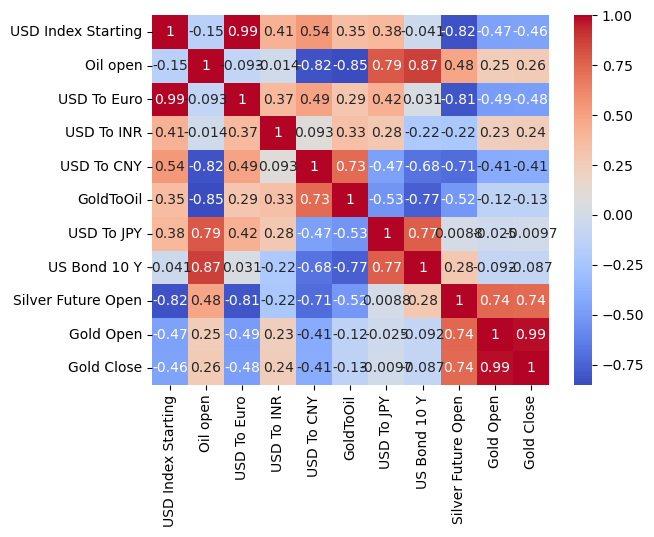

In [5]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

In [6]:
Predictors= df.iloc[:,:-1]

In [7]:
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(Predictors)

In [8]:
Predictions = df.iloc[:,-1]

In [9]:
# df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
# df_pca['target'] = Predictions

In [10]:
# # Create a scatter plot of the first two principal components
# # Create figure and axis objects
# fig, ax = plt.subplots()
# plt.scatter(principal_components[:, 0], principal_components[:, 1])
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')

# # Plot horizontal line at y=0
# ax.axhline(y=0, color='grey', linestyle='--')

# # Plot vertical line at x=0
# ax.axvline(x=0, color='grey', linestyle='--')

# plt.show()

USD Index Starting       AxesSubplot(0.125,0.798085;0.168478x0.0819149)
Oil open              AxesSubplot(0.327174,0.798085;0.168478x0.0819149)
USD To Euro           AxesSubplot(0.529348,0.798085;0.168478x0.0819149)
USD To INR            AxesSubplot(0.731522,0.798085;0.168478x0.0819149)
USD To CNY               AxesSubplot(0.125,0.699787;0.168478x0.0819149)
GoldToOil             AxesSubplot(0.327174,0.699787;0.168478x0.0819149)
USD To JPY            AxesSubplot(0.529348,0.699787;0.168478x0.0819149)
US Bond 10 Y          AxesSubplot(0.731522,0.699787;0.168478x0.0819149)
Silver Future Open       AxesSubplot(0.125,0.601489;0.168478x0.0819149)
Gold Open             AxesSubplot(0.327174,0.601489;0.168478x0.0819149)
dtype: object

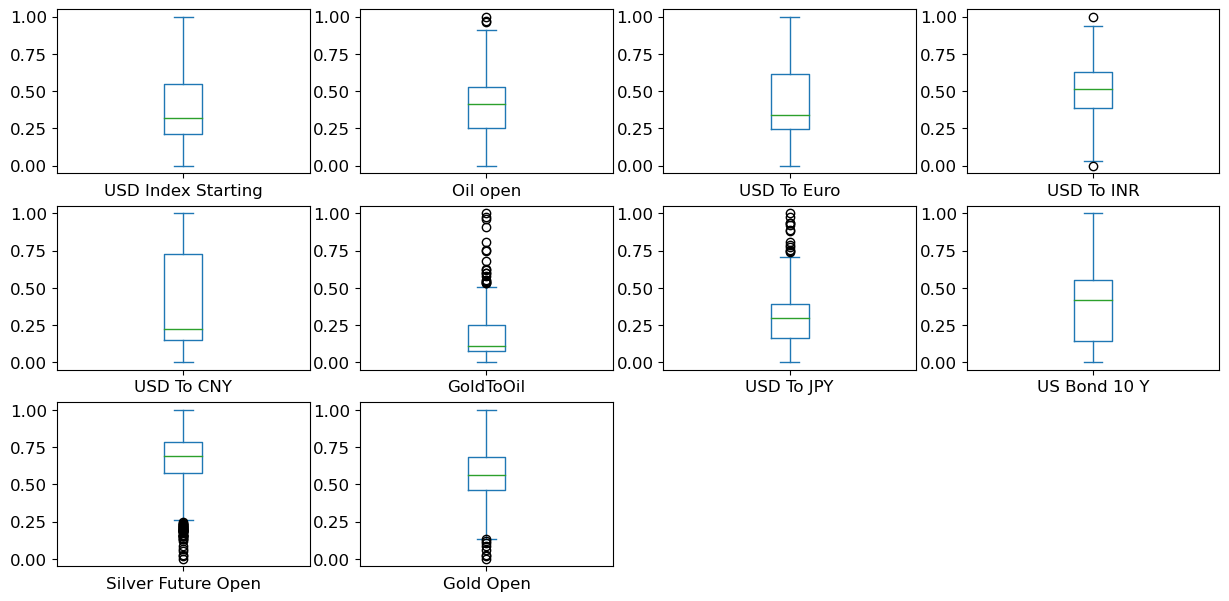

In [11]:
Predictors.plot(kind='box', subplots=True, layout=(8,4), sharex=False,
sharey=False, fontsize=12, figsize=(15,20))

Gold Close    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

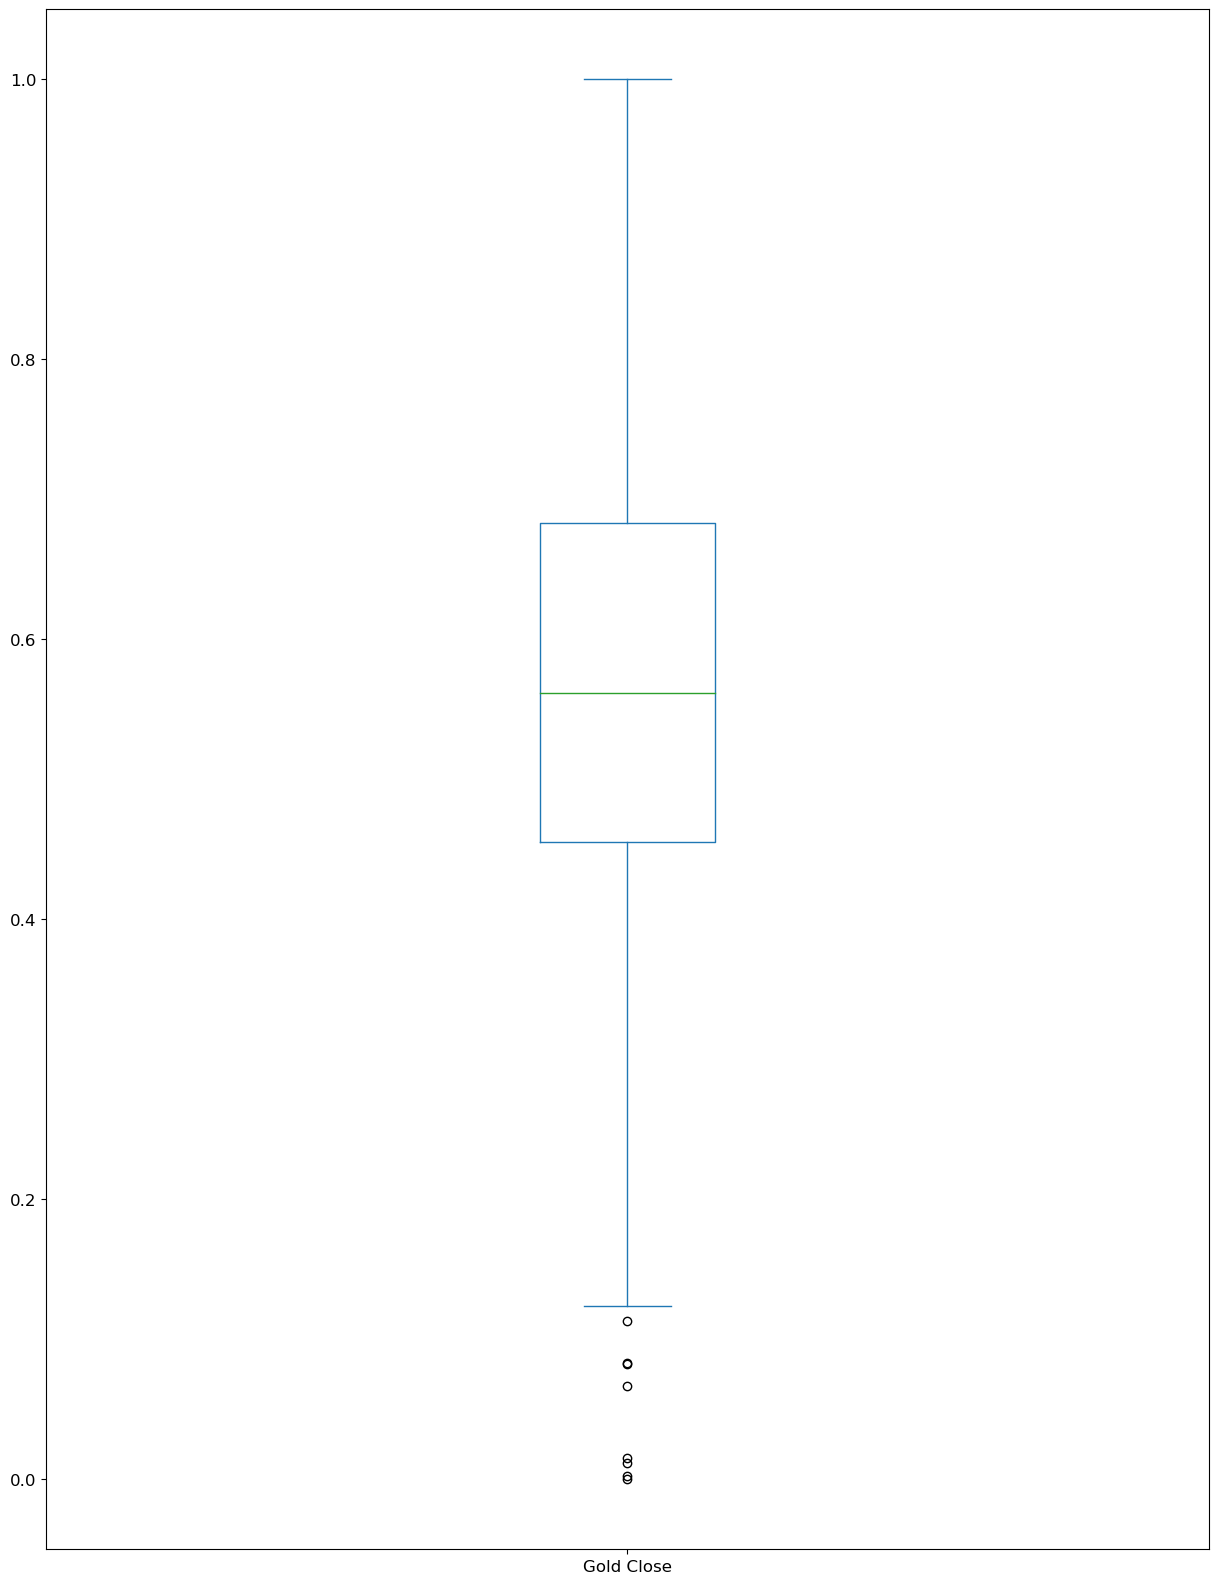

In [12]:
Predictions.plot(kind='box', subplots=True, sharex=False,
sharey=False, fontsize=12, figsize=(15,20))

In [13]:
corr = Predictors.corrwith(Predictions)
print(type(corr))
print(corr)


<class 'pandas.core.series.Series'>
USD Index Starting   -0.456162
Oil open              0.255600
USD To Euro          -0.481655
USD To INR            0.237863
USD To CNY           -0.408544
GoldToOil            -0.127967
USD To JPY           -0.009676
US Bond 10 Y         -0.086841
Silver Future Open    0.737618
Gold Open             0.985007
dtype: float64


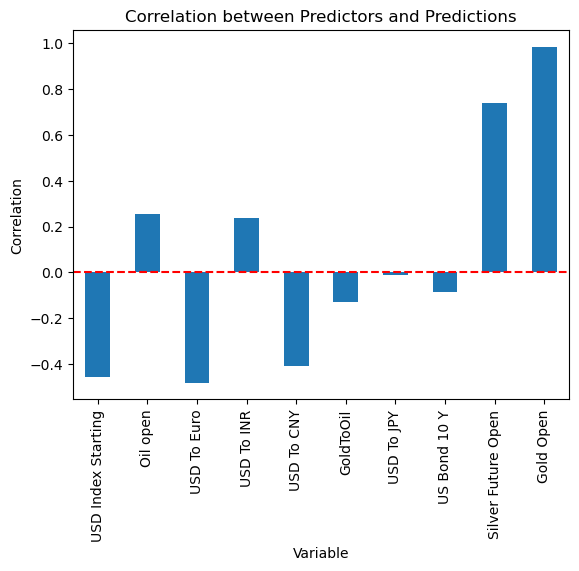

In [14]:
corr.plot.bar()
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Correlation between Predictors and Predictions')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.show()

In [15]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(Predictors, Predictions,random_state=0,test_size=0.2) 

In [16]:
# print(f"X Train : {len(X_train)} X Test: {len(X_test)}, X: {len(Predictors)}")

In [17]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [18]:
a= pd.concat([Predictors,Predictions],axis=1)
reframed = series_to_supervised(a, 1, 1)
# drop columns we don't want to predict
# reframed.drop(reframed.columns[[11,12,13,14,15,16,17,18,19,20]], axis=1, inplace=True)
print(reframed.head)

<bound method NDFrame.head of      var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1     0.525698   0.435452   0.632968   0.043941   0.760321   0.071094   
2     0.548458   0.431692   0.663038   0.099927   0.761716   0.074242   
3     0.556535   0.454342   0.668285   0.143710   0.762995   0.072433   
4     0.538179   0.447180   0.647377   0.186775   0.774625   0.072178   
5     0.551395   0.446553   0.672513   0.206874   0.739621   0.075350   
..         ...        ...        ...        ...        ...        ...   
561   0.684288   0.908773   0.767815   0.837427   0.073148   0.006553   
562   0.692364   0.884423   0.766092   0.804554   0.067333   0.009395   
563   0.696769   0.894897   0.783633   0.798094   0.066054   0.006216   
564   0.716593   0.810295   0.775881   0.763010   0.072450   0.016428   
565   0.664464   0.826141   0.713156   0.710269   0.063612   0.015815   

     var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...   var2(t)   var3(t)  \
1     0.286927  

In [19]:
# split into train and test sets
values = reframed.values

n_train_time = 80
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(80, 1, 21) (80,) (485, 1, 21) (485,)


In [20]:
model = Sequential()
model.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(units=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=30, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)


shape 1,21
Epoch 1/30
8/8 - 5s - loss: 0.0388 - val_loss: 0.2368 - 5s/epoch - 589ms/step
Epoch 2/30
8/8 - 0s - loss: 0.0082 - val_loss: 0.1313 - 184ms/epoch - 23ms/step
Epoch 3/30
8/8 - 0s - loss: 0.0164 - val_loss: 0.1910 - 186ms/epoch - 23ms/step
Epoch 4/30
8/8 - 0s - loss: 0.0101 - val_loss: 0.1804 - 180ms/epoch - 22ms/step
Epoch 5/30
8/8 - 0s - loss: 0.0079 - val_loss: 0.1511 - 211ms/epoch - 26ms/step
Epoch 6/30
8/8 - 0s - loss: 0.0078 - val_loss: 0.1598 - 174ms/epoch - 22ms/step
Epoch 7/30
8/8 - 0s - loss: 0.0067 - val_loss: 0.1549 - 192ms/epoch - 24ms/step
Epoch 8/30
8/8 - 0s - loss: 0.0063 - val_loss: 0.1375 - 180ms/epoch - 22ms/step
Epoch 9/30
8/8 - 0s - loss: 0.0057 - val_loss: 0.1275 - 179ms/epoch - 22ms/step
Epoch 10/30
8/8 - 0s - loss: 0.0056 - val_loss: 0.1102 - 170ms/epoch - 21ms/step
Epoch 11/30
8/8 - 0s - loss: 0.0049 - val_loss: 0.0963 - 173ms/epoch - 22ms/step
Epoch 12/30
8/8 - 0s - loss: 0.0045 - val_loss: 0.0785 - 172ms/epoch - 22ms/step
Epoch 13/30
8/8 - 0s - loss:

In [21]:
# assume `model` is a trained scikit-learn model
model.save('model.h5') # Save the model to a .h5 file
# dump(model, 'model.joblib')

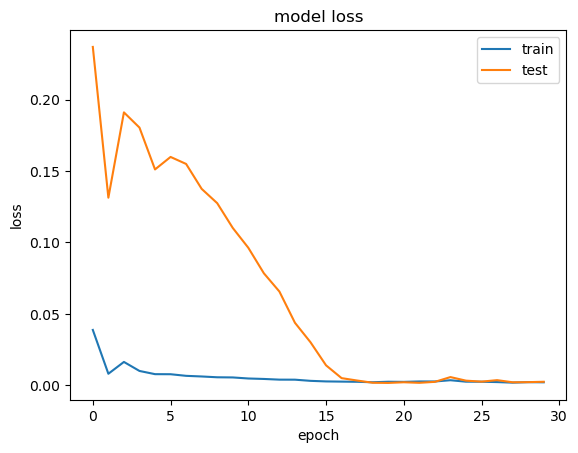

16/16 [==============================] - 1s 4ms/step
Test RMSE: 29.121


In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
# print(test_X)
test_X = test_X.reshape((test_X.shape[0], 21))
# invert scaling for forecast
inv_yhat = np.concatenate((test_X[:, -10:],yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:, -10:],test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [23]:
def recursive_forecast(model, input_data, n_days):
    forecast = []
    current_input = input_data[-1].copy()

    for _ in range(n_days):
        prediction = model.predict(current_input.reshape(1, 1, -1))
        forecast.append(prediction[0, 0])
        current_input = np.roll(current_input, -1)
        current_input[-1] = prediction

    return np.array(forecast)

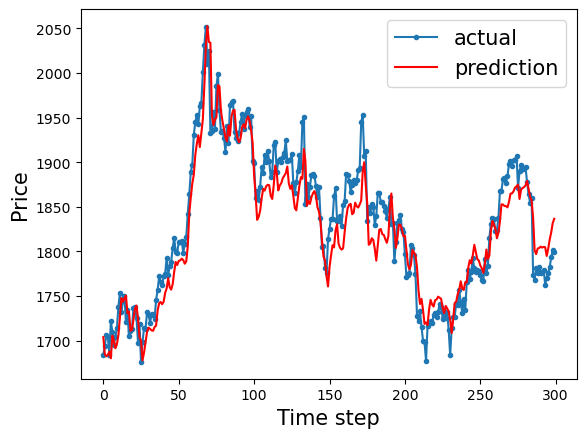

In [24]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.

interval = 300
aa=[x for x in range(interval)]
plt.plot(aa, inv_y[:interval], marker='.', label="actual")
plt.plot(aa, inv_yhat[:interval], 'r', label="prediction")
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [25]:
n_days = 7
yhat = recursive_forecast(model, test_X, n_days)
# Reshape yhat to (1, n_days)
yhat = yhat.reshape(-1, 1)
print(yhat)

1/1 [==============================] - 0s 17ms/step
[[0.8738304 ]
 [0.8675647 ]
 [0.7425829 ]
 [0.72162735]
 [0.8580005 ]
 [0.63553935]
 [0.50760746]]


In [26]:
# print(test_X[:, -10:].shape)
# padded_inv_yhat[:, :15] = inv_yhat

# # Create a padded array with the same number of columns as the scaler expects
# padded_inv_yhat = np.zeros((1, scaler.scale_.shape[0]))

# # Replace the first 15 columns with the values from inv_yhat
# padded_inv_yhat[0:5, :10] = inv_yhat

# # Inverse transform padded_inv_yhat using the scaler
# inv_yhat = scaler.inverse_transform(padded_inv_yhat)

# # Extract the last n_days values from inv_yhat
# inv_yhat = inv_yhat[0, -n_days:]

# # invert scaling for forecast

inv_yhat = np.concatenate((test_X[:n_days, -10:],yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]

print(inv_yhat)

# inv_yhat = np.concatenate((test_X[:, -10:],yhat), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,-1]

[1979.05340924 1975.45564468 1903.69112363 1891.65844062 1969.96390373
 1842.22671423 1768.76822759]


[59, 60, 61, 62, 63, 64, 65, 66]


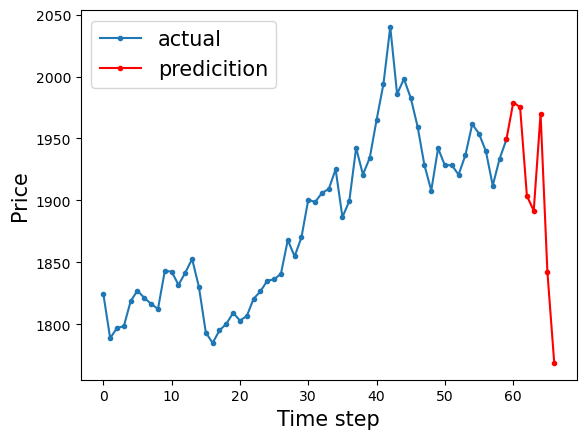

In [27]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours.

interval = 60
predictinterval = interval+n_days
aa=[x for x in range(interval)]
bb = [x for x in range(interval-1,predictinterval)]
print(bb)


plt.plot(aa, inv_y[len(inv_y) - interval:], marker='.', label="actual")
inv_yhat = np.insert(inv_yhat, 0, inv_y[-1])
plt.plot(bb, inv_yhat[:], 'r', marker='.', label="predicition")
# plt.plot(aa, inv_yhat[:interval], 'r', label="prediction")
plt.ylabel('Price', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()
